<a href="https://colab.research.google.com/github/marinavasqr23/HW1-ICA/blob/main/Homework_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ANÁLISE DE DADOS DATASET "WHINE QUALITY"

# 1. IMPORTANDO BIBLIOTECAS

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
import math



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 2. TRATANDO OS DADOS

In [ ]:
dt_whine_red = pd.read_csv("/content/drive/MyDrive/Homework/winequality-red.csv", sep=";")
dt_whine_white = pd.read_csv("/content/drive/MyDrive/Homework/winequality-white.csv", sep=";")

In [ ]:
dt_whine_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   object 
 11  quality               1599 non-null   int64  
dtypes: float64(10), int64(1), object(1)
memory usage: 150.0+ KB


In [ ]:
dt_whine_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [ ]:
# CONFERINDO INCONSISTÊNCIA ENTRE OS VALORES PARA PADRONIZAR OS TIPOS
# Tudo OK
dt_whine_white['alcohol'].unique()

array([ 8.8       ,  9.5       , 10.1       ,  9.9       ,  9.6       ,
       11.        , 12.        ,  9.7       , 10.8       , 12.4       ,
       11.4       , 12.8       , 11.3       , 10.5       ,  9.3       ,
       10.        , 10.4       , 11.6       , 12.3       , 10.2       ,
        9.        , 11.2       ,  8.6       ,  9.4       ,  9.8       ,
       11.7       , 10.9       ,  9.1       ,  8.9       , 10.3       ,
       12.6       , 10.7       , 12.7       , 10.6       ,  9.2       ,
        8.7       , 11.5       , 11.8       , 12.1       , 11.1       ,
        8.5       , 12.5       , 11.9       , 12.2       , 12.9       ,
       13.9       , 14.        , 13.5       , 13.3       , 13.2       ,
       13.7       , 13.4       , 13.        ,  8.        , 13.1       ,
       13.6       ,  8.4       , 14.2       , 11.94      , 12.89333333,
       11.46666667, 10.98      , 10.03333333, 11.43333333, 10.53333333,
        9.53333333, 10.93333333, 11.36666667, 11.33333333, 11.06

In [ ]:
# CONFERINDO INCONSISTÊNCIA ENTRE OS VALORES PARA PADRONIZAR OS TIPOS
# Observe que alguns valores estranhos e por isso a coluna está como Object
dt_whine_red['alcohol'].unique()

array(['9.4', '9.8', '10', '9.5', '10.5', '9.2', '9.9', '9.1', '9.3', '9',
       '9.7', '10.1', '10.6', '9.6', '10.8', '10.3', '13.1', '10.2',
       '10.9', '10.7', '12.9', '10.4', '13', '14', '11.5', '11.4', '12.4',
       '11', '12.2', '12.8', '12.6', '12.5', '11.7', '11.3', '12.3', '12',
       '11.9', '11.8', '8.7', '13.3', '11.2', '11.6', '11.1', '13.4',
       '12.1', '8.4', '12.7', '14.9', '13.2', '13.6', '13.5',
       '100.333.333.333.333', '9.55', '8.5', '110.666.666.666.667',
       '956.666.666.666.667', '10.55', '8.8', '135.666.666.666.667',
       '11.95', '9.95', '923.333.333.333.333', '9.25', '9.05', '10.75'],
      dtype=object)

In [ ]:
# Lista com os valores a serem corrigidos e suas substituições
dict_whine_red = {
    '100.333.333.333.333': '100',
    '110.666.666.666.667': '110',
    '956.666.666.666.667': '956',
    '135.666.666.666.667': '135',
    '923.333.333.333.333': '923'
}

In [ ]:
# Substituindo os valores
dt_whine_red['alcohol'] = dt_whine_red['alcohol'].replace(dict_whine_red)

In [ ]:
# Valores substituídos
dt_whine_red['alcohol'].unique()

array(['9.4', '9.8', '10', '9.5', '10.5', '9.2', '9.9', '9.1', '9.3', '9',
       '9.7', '10.1', '10.6', '9.6', '10.8', '10.3', '13.1', '10.2',
       '10.9', '10.7', '12.9', '10.4', '13', '14', '11.5', '11.4', '12.4',
       '11', '12.2', '12.8', '12.6', '12.5', '11.7', '11.3', '12.3', '12',
       '11.9', '11.8', '8.7', '13.3', '11.2', '11.6', '11.1', '13.4',
       '12.1', '8.4', '12.7', '14.9', '13.2', '13.6', '13.5', '100',
       '9.55', '8.5', '110', '956', '10.55', '8.8', '135', '11.95',
       '9.95', '923', '9.25', '9.05', '10.75'], dtype=object)

In [ ]:
# Alterando para numeric
dt_whine_red['alcohol'] = pd.to_numeric(dt_whine_red['alcohol'])

In [ ]:
# Dividindo os  valores substituídos
dt_whine_red['alcohol'] = np.where(
    dt_whine_red['alcohol'] >= 100,
    dt_whine_red['alcohol'] / 100,
    dt_whine_red['alcohol']
)

In [ ]:
dt_whine_red['alcohol'].unique()

array([ 9.4 ,  9.8 , 10.  ,  9.5 , 10.5 ,  9.2 ,  9.9 ,  9.1 ,  9.3 ,
        9.  ,  9.7 , 10.1 , 10.6 ,  9.6 , 10.8 , 10.3 , 13.1 , 10.2 ,
       10.9 , 10.7 , 12.9 , 10.4 , 13.  , 14.  , 11.5 , 11.4 , 12.4 ,
       11.  , 12.2 , 12.8 , 12.6 , 12.5 , 11.7 , 11.3 , 12.3 , 12.  ,
       11.9 , 11.8 ,  8.7 , 13.3 , 11.2 , 11.6 , 11.1 , 13.4 , 12.1 ,
        8.4 , 12.7 , 14.9 , 13.2 , 13.6 , 13.5 ,  1.  ,  9.55,  8.5 ,
        1.1 ,  9.56, 10.55,  8.8 ,  1.35, 11.95,  9.95,  9.23,  9.25,
        9.05, 10.75])

In [ ]:
dt_whine_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
# Fazemos um concatenção da tabelas
dt_whine_all = pd.concat([dt_whine_red, dt_whine_white], ignore_index=True)

In [ ]:
# Analisando nosso dataset percebemos uma discrepancia entre o minimo e maximo da densidade
dt_whine_all.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,1.292975,3.218501,0.531268,10.485604,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,4.821671,0.160787,0.148806,1.214552,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,1.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,100.369000,4.010000,2.000000,14.900000,9.000000


In [ ]:
# Analisando valores maiores que média da densidade, observamos que temos 4 linhas com valores muito discrepantes
bigger_than_one = dt_whine_red[dt_whine_red['density'] > 1]['density']
print("Valores > 1:")
print(bigger_than_one.head())

Valores > 1:
243    100.005
244    100.005
266    100.025
284    100.015
285    100.015
Name: density, dtype: float64


In [ ]:
dt_whine_red['density'] = np.where (
    dt_whine_red['density'] > 1,
    dt_whine_red['density'] > 100,
    dt_whine_red['density']
)

# 3. ANÁLISE UNIVARIADA INCONDICIONAL

3.1. Histograma dos Preditores

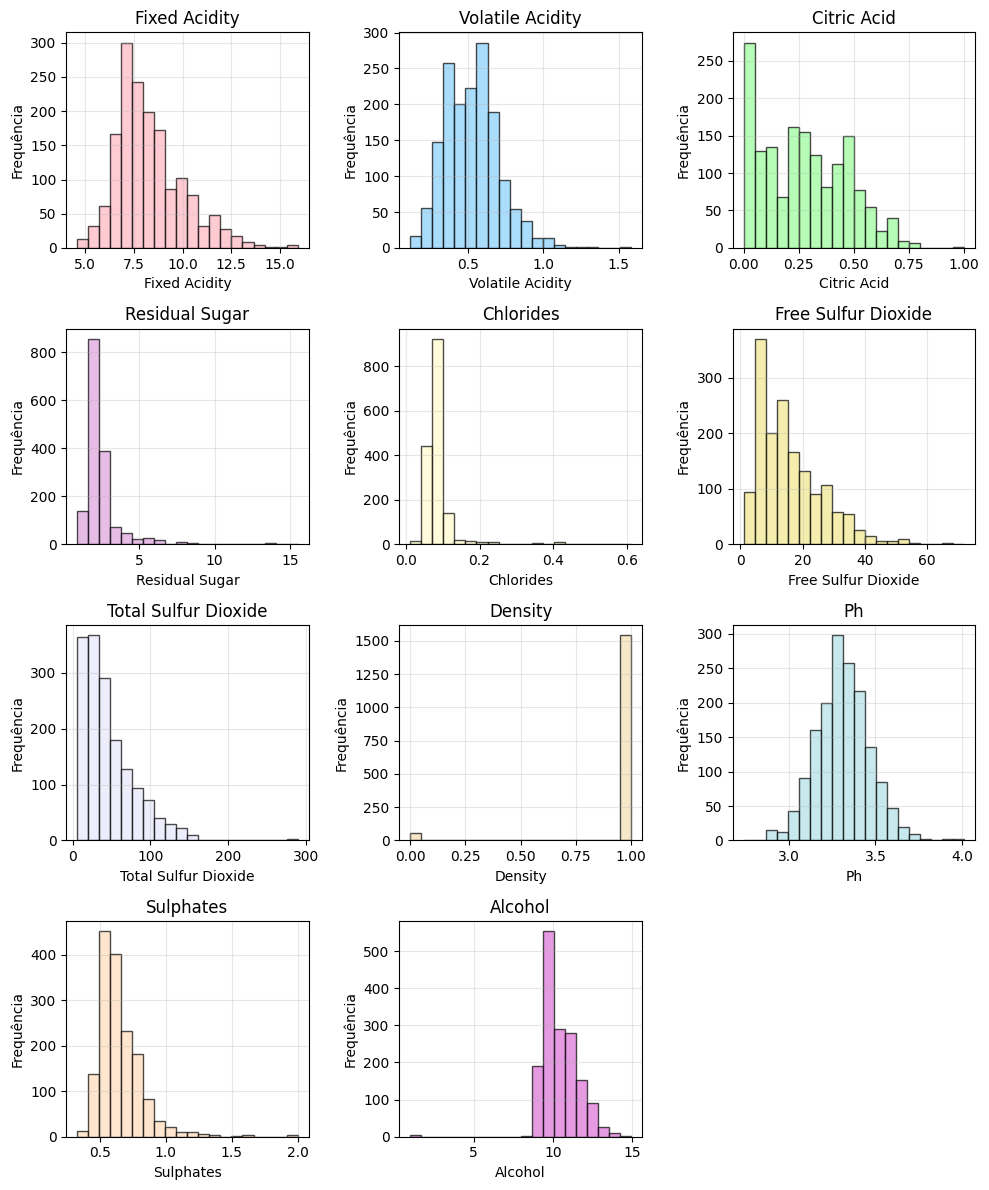

In [ ]:
def univariate_statistics_histogram_frequency(dataset):
    predictors_columns = dataset.columns[:11]

    fig, axs = plt.subplots(4, 3, figsize=(10, 12))
    axs = axs.flatten()

    colors = ['#FFB6C1', '#87CEFA', '#98FB98', '#DDA0DD', '#FFFACD','#F0E68C', '#E6E6FA', '#F5DEB3', '#B0E0E6', '#FFDAB9', '#DA70D6']

    for i, column in enumerate(predictors_columns):
        data = dataset[column]

        axs[i].hist(data, bins=20, color=colors[i], edgecolor='black', alpha=0.7)
        axs[i].set_title(f"{column.title()}")
        axs[i].set_xlabel(column.title())
        axs[i].set_ylabel("Frequência")
        axs[i].grid(True, alpha=0.3)

    for i in range(len(predictors_columns), len(axs)):
        axs[i].set_visible(False)

    plt.tight_layout()
    plt.show()
univariate_statistics_histogram_frequency(dt_whine_red)

3.2. Calculando os valores da Média, Desvio Padrão e Assimetria de cada preditor

In [ ]:
def univariate_statistics_values(dt_whine_all):
    values = []
    predictors_columns = dt_whine_all.columns[:11]

    for column in predictors_columns:
        mean = dt_whine_all[column].mean() # Média
        std_dev = dt_whine_all[column].std() # Desvio padrão
        skewness = dt_whine_all[column].skew() # Assimetria

        values.append({
            "Preditor": column,
            "Média (µ)": round(mean, 4),
            "Desvio Padrão (σ)": round(std_dev, 4),
            "Assimetria (γ)": round(skewness, 4)
        })

    results = pd.DataFrame(values)
    return results

table_statistics = univariate_statistics_values(dt_whine_all)
print(table_statistics.to_string(index=False))

            Preditor  Média (µ)  Desvio Padrão (σ)  Assimetria (γ)
       fixed acidity     7.2153             1.2964          1.7233
    volatile acidity     0.3397             0.1646          1.4951
         citric acid     0.3186             0.1453          0.4717
      residual sugar     5.4432             4.7578          1.4354
           chlorides     0.0560             0.0350          5.3998
 free sulfur dioxide    30.5253            17.7494          1.2201
total sulfur dioxide   115.7446            56.5219         -0.0012
             density     0.9744             0.1404         -6.7974
                  pH     3.2185             0.1608          0.3868
           sulphates     0.5313             0.1488          1.7973
             alcohol    10.4856             1.2146          0.2647
